# **Problem:**
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

# **Aim:**
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

In [236]:
# Importing Usefull Python Library

In [237]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler


from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')

In [238]:
features_df = pd.read_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/features.csv')

In [239]:
stores_df = pd.read_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/stores.csv')

In [240]:
train_df = pd.read_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/train.csv')

In [241]:
test_df = pd.read_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/test.csv')

**Reading and Understanding the Dataset**

In [242]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [243]:
stores_df.shape

(45, 3)

In [244]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [245]:
train_df.shape

(421570, 5)

In [246]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [247]:
test_df.shape

(115064, 4)

In [248]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [249]:
features_df.shape

(8190, 12)

In [250]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [251]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


**Handling Missing Value in features dataframe**

In [252]:
features_df["CPI"].fillna(features_df["CPI"].mean(),inplace=True)
features_df["Unemployment"].fillna(features_df["Unemployment"].mean(),inplace=True)

In [253]:
for i in range(1,6):
  features_df["MarkDown"+str(i)] = features_df["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features_df["MarkDown"+str(i)].fillna(value=0,inplace=True)

**Merging DataFrame**

In [254]:
df_1 = pd.merge(features_df,stores_df,on='Store')

In [255]:
final_train_df = pd.merge(train_df, df_1, on = ['Store','Date','IsHoliday'])

In [256]:
final_train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [257]:
final_train_df.shape

(421570, 16)

**Splitting Date Column to create additional features**

In [258]:
final_train_df['Date'] = pd.to_datetime(final_train_df['Date'])
final_train_df['Year'] = final_train_df['Date'].dt.year
final_train_df['Month'] = final_train_df['Date'].dt.month
final_train_df['Week'] = final_train_df['Date'].dt.week

**Summing markdown columns into a single column after careful analysis**

In [259]:
final_train_df['Total_MarkDown'] = final_train_df['MarkDown1']+final_train_df['MarkDown2']+final_train_df['MarkDown3']+final_train_df['MarkDown4']+final_train_df['MarkDown5']

In [260]:
final_train_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

**Data Visualization**

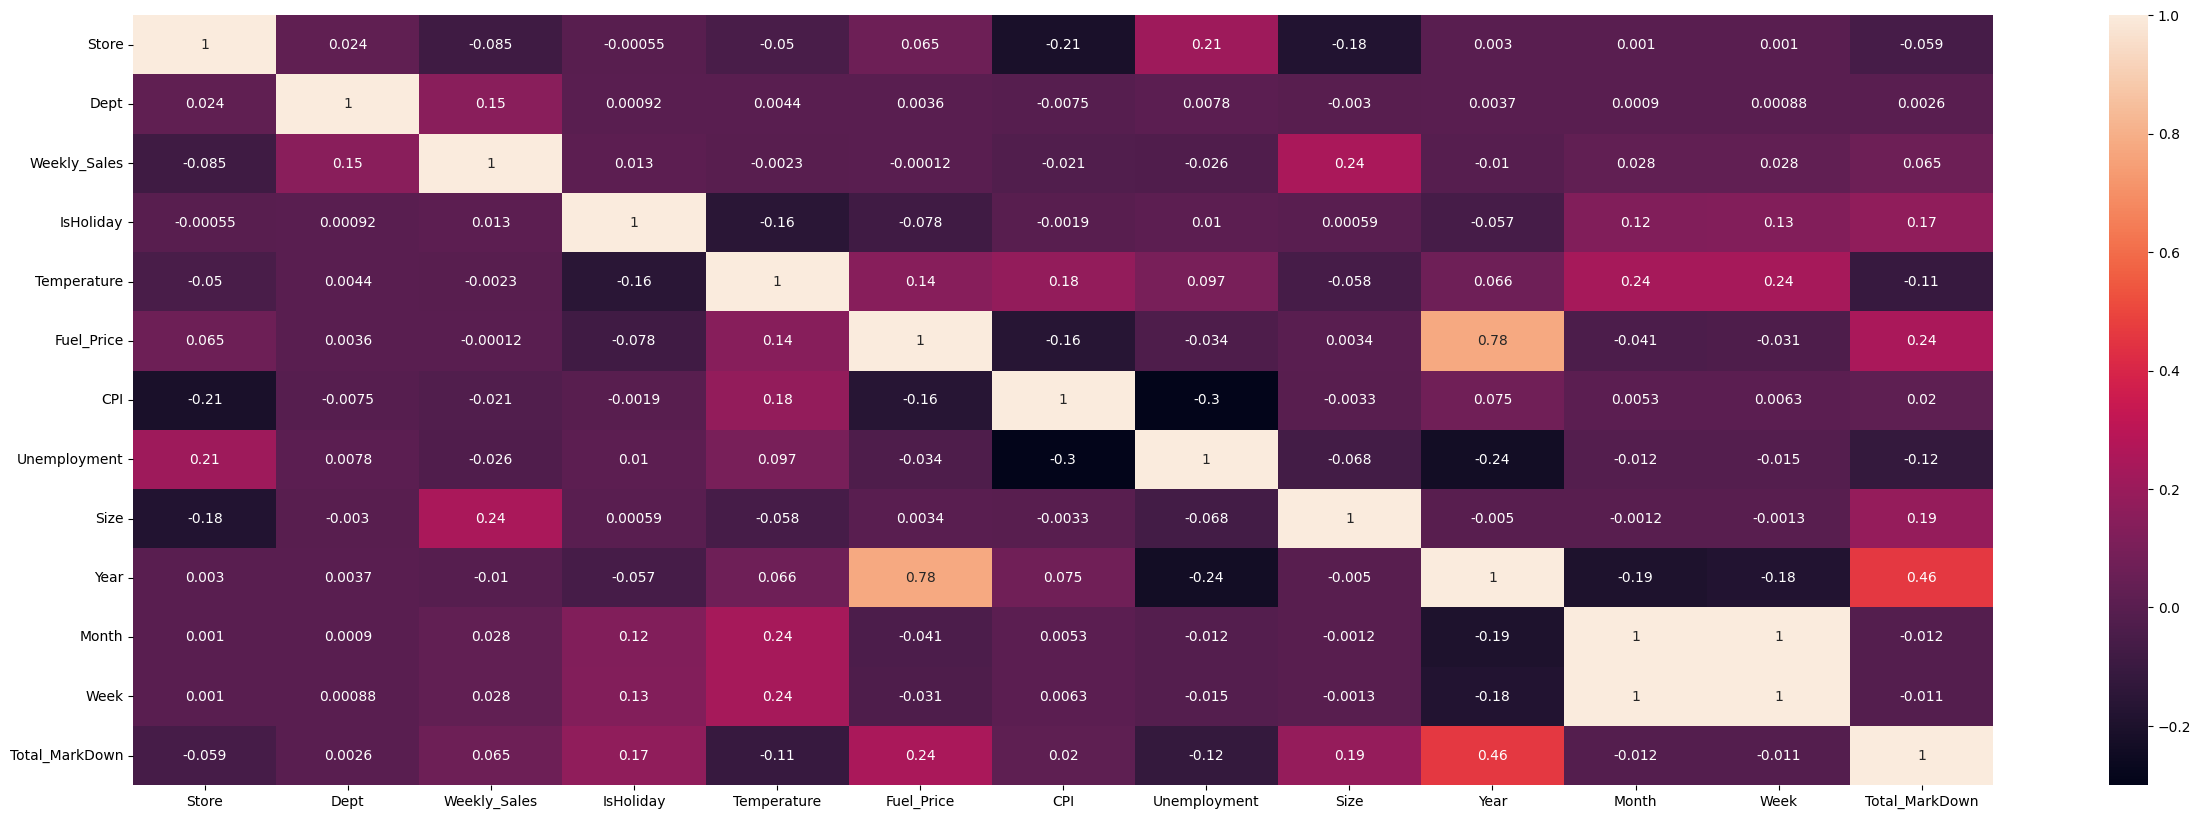

In [261]:
plt.figure(figsize= (30,10))
sns.heatmap(final_train_df.corr(), annot=True)
plt.show()

In [262]:
# Monthly sales plot for each year

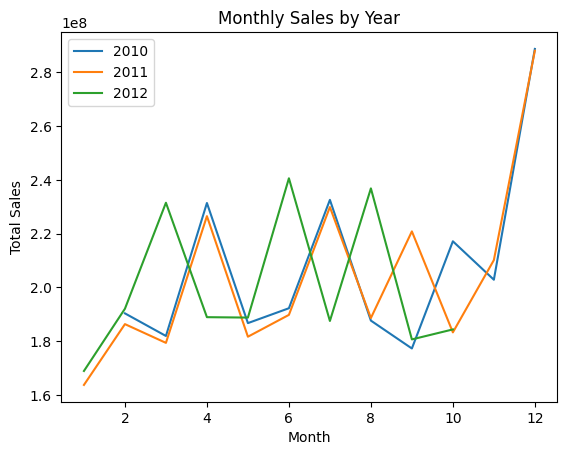

In [263]:

years = final_train_df['Year'].unique()

for year in years:
    df_year = final_train_df[final_train_df['Year'] == year]
    monthly_sales = df_year.groupby('Month')['Weekly_Sales'].sum()
    monthly_sales.plot(label=year)

plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [264]:
# Average yearly sales for each stores

<Figure size 8000x4000 with 0 Axes>

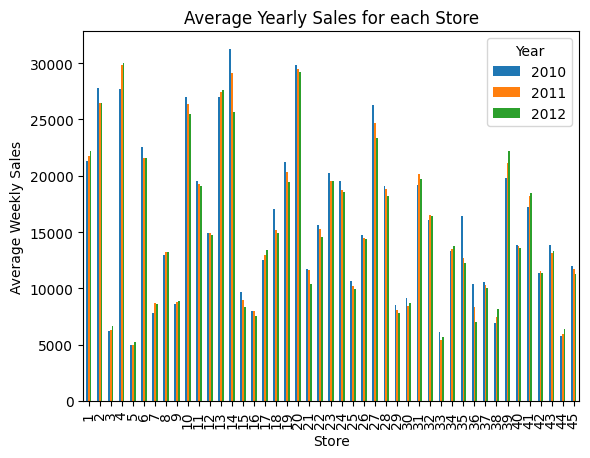

In [265]:
plt.figure(figsize=(80, 40))
average_yearly_sales = final_train_df.groupby(['Store', 'Year'])['Weekly_Sales'].mean().unstack()
average_yearly_sales.plot(kind='bar')
plt.title('Average Yearly Sales for each Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()


In [266]:
# Average monthly sales for each store

<Figure size 4000x4000 with 0 Axes>

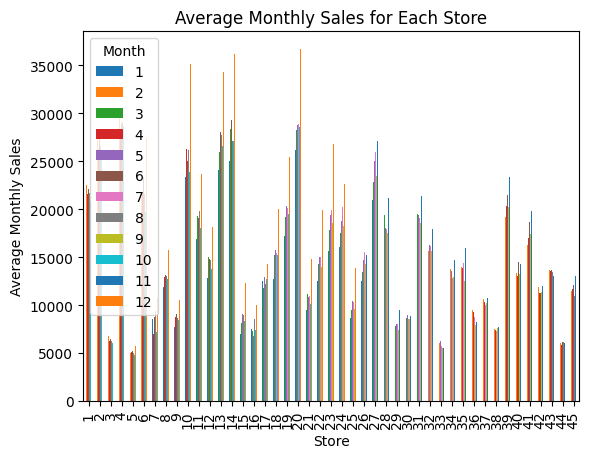

In [267]:
import matplotlib.pyplot as plt
average_monthly_sales = final_train_df.groupby(['Store', 'Month'])['Weekly_Sales'].mean().unstack()

plt.figure(figsize=(40, 40))
average_monthly_sales.plot(kind='bar')

plt.xlabel('Store')
plt.ylabel('Average Monthly Sales')
plt.title('Average Monthly Sales for Each Store')
plt.legend(title='Month')
plt.show()


In [268]:
# Holidays impact on sales

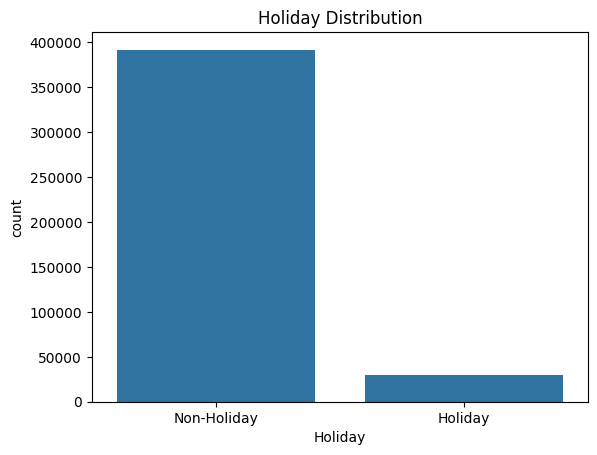

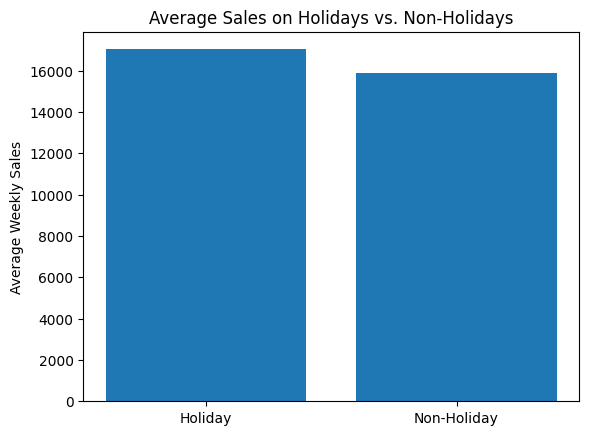

In [269]:
 # Create a new column to indicate holidays
final_train_df['Holiday'] = final_train_df['IsHoliday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Plot holiday distribution
sns.countplot(data=final_train_df, x='Holiday')
plt.title('Holiday Distribution')
plt.show()

# Calculate average sales on holidays and non-holidays
holiday_sales = final_train_df[final_train_df['Holiday'] == 'Holiday']['Weekly_Sales'].mean()
non_holiday_sales = final_train_df[final_train_df['Holiday'] == 'Non-Holiday']['Weekly_Sales'].mean()

# Plot the average sales
plt.bar(['Holiday', 'Non-Holiday'], [holiday_sales, non_holiday_sales])
plt.title('Average Sales on Holidays vs. Non-Holidays')
plt.ylabel('Average Weekly Sales')
plt.show()


In [270]:
# Temperatures impact on sales

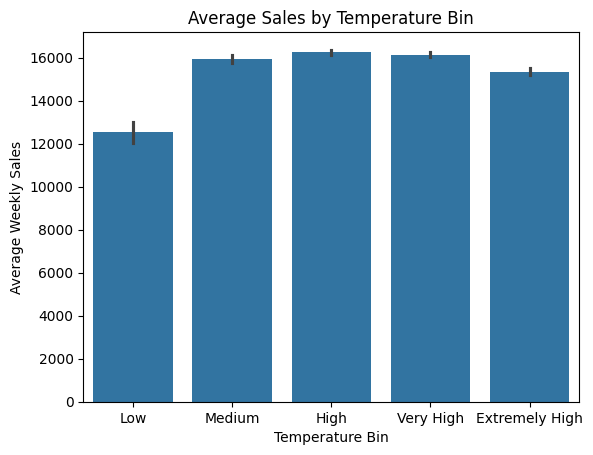

Average Sales by Temperature Bin:
Low: 12530.28484764543
Medium: 15923.855304132514
High: 16247.498595446421
Very High: 16139.425496437056
Extremely High: 15351.91552878603


In [271]:
# Create a new column to indicate temperature bins
final_train_df['Temperature_Bin'] = pd.cut(final_train_df['Temperature'], bins=5, labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Plot average sales for each temperature bin
sns.barplot(x='Temperature_Bin', y='Weekly_Sales', data=final_train_df)
plt.title('Average Sales by Temperature Bin')
plt.xlabel('Temperature Bin')
plt.ylabel('Average Weekly Sales')
plt.show()

# Calculate average sales for each temperature bin
average_sales_by_temperature = final_train_df.groupby('Temperature_Bin')['Weekly_Sales'].mean()

# Print the average sales for each temperature bin
print('Average Sales by Temperature Bin:')
for temperature_bin, average_sales in average_sales_by_temperature.items():
    print(f'{temperature_bin}: {average_sales}')


**Creating Dummy Column and Scaling Numerical Features**

In [272]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']

In [273]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the data
final_train_df[num_col] = scaler.fit_transform(final_train_df[num_col])

In [274]:
final_train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,Total_MarkDown,Holiday,Temperature_Bin
0,1,1,2010-02-05,0.042851,False,0.434149,0.0501,0.8405,0.405118,A,0.630267,2010,2,5,0.0,Non-Holiday,High
1,1,2,2010-02-05,0.079638,False,0.434149,0.0501,0.8405,0.405118,A,0.630267,2010,2,5,0.0,Non-Holiday,High
2,1,3,2010-02-05,0.026829,False,0.434149,0.0501,0.8405,0.405118,A,0.630267,2010,2,5,0.0,Non-Holiday,High
3,1,4,2010-02-05,0.064380,False,0.434149,0.0501,0.8405,0.405118,A,0.630267,2010,2,5,0.0,Non-Holiday,High
4,1,5,2010-02-05,0.053315,False,0.434149,0.0501,0.8405,0.405118,A,0.630267,2010,2,5,0.0,Non-Holiday,High


In [275]:
cat_col = ['Store','Dept','Type']
data_cat = final_train_df[cat_col].copy()

In [276]:
data_cat = pd.get_dummies(data_cat,columns=cat_col, drop_first= True)

In [277]:
final_df = pd.concat([final_train_df, data_cat],axis=1)

In [278]:
final_df.drop(columns=cat_col,inplace=True)

**Converting 'IsHoliday' Datatype from Boolean to Integer**

In [279]:
final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)

**Dropping Date Column as we already extracted its feature**

In [280]:
final_df.drop(columns=['Date'],inplace=True)

In [281]:
final_df.shape

(421570, 139)

**Spiltting Target column and Predictive Column**

In [110]:
y = final_df.pop('Weekly_Sales')
X = final_df

**Using Random Forest Regression for Feature elimination**

In [282]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=25)
radm_clf.fit(X, y)

RandomForestRegressor(n_estimators=25, oob_score=True)

**Creating a dataframe to showcase each features importance**

In [283]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(X.shape[1]):
    feature_rank.loc[f] = [f+1,
                           X.columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]



In [284]:
feature_rank

,rank,feature,importance
0,1,Size,0.191861
1,2,Dept_92,0.105918
2,3,Dept_95,0.090274
3,4,Dept_38,0.066400
4,5,Week,0.049744
...,...,...,...
131,132,Store_5,0.000075
132,133,Store_30,0.000073
133,134,Store_34,0.000062
134,135,Dept_39,0.000038


**Selecting Top 25 Features bvased on its importance**

In [285]:
x=feature_rank.loc[0:25,['feature']]
x=x['feature'].tolist()
print(x)

['Size', 'Dept_92', 'Dept_95', 'Dept_38', 'Week', 'Dept_90', 'Dept_72', 'Dept_40', 'Dept_2', 'Dept_91', 'Dept_94', 'Store_10', 'Dept_13', 'Dept_8', 'CPI', 'Dept_93', 'Type_B', 'Dept_4', 'Dept_7', 'Temperature', 'Unemployment', 'Month', 'Dept_5', 'Dept_79', 'Dept_23', 'Dept_9']


**Data Splitted into Training and Validation Sets**

In [286]:
X_train,X_val,y_train,y_val = train_test_split(X[x],y,test_size=0.25, random_state=50)

**Linear Regression Model**

In [287]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [288]:
lr_acc = lr.score(X_val,y_val)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  57.713368657960906


In [289]:
y_pred = lr.predict(X_val)

**Evaluating built model**

In [290]:
print("MAE" , metrics.mean_absolute_error(y_val, y_pred))
print("MSE" , metrics.mean_squared_error(y_val, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print("R2" , metrics.explained_variance_score(y_val, y_pred))

MAE 0.013780220954919369
MSE 0.0004484739498383898
RMSE 0.021177203541506366
R2 0.5771402875904732


**Storing Predicted value under results folder**

In [291]:
lr_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
lr_df.to_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/lr_real_pred.csv')
lr_df

,Actual,Predicted
105344,0.084861,0.063616
123218,0.013044,0.030529
339421,0.012214,0.012657
207114,0.048672,0.079558
88467,0.008990,0.032248
...,...,...
207791,0.007503,0.014137
195777,0.085671,0.027088
187541,0.019868,0.026316
222952,0.027614,0.017015


**Plot and Store Prediction Vs Actuals sales number**

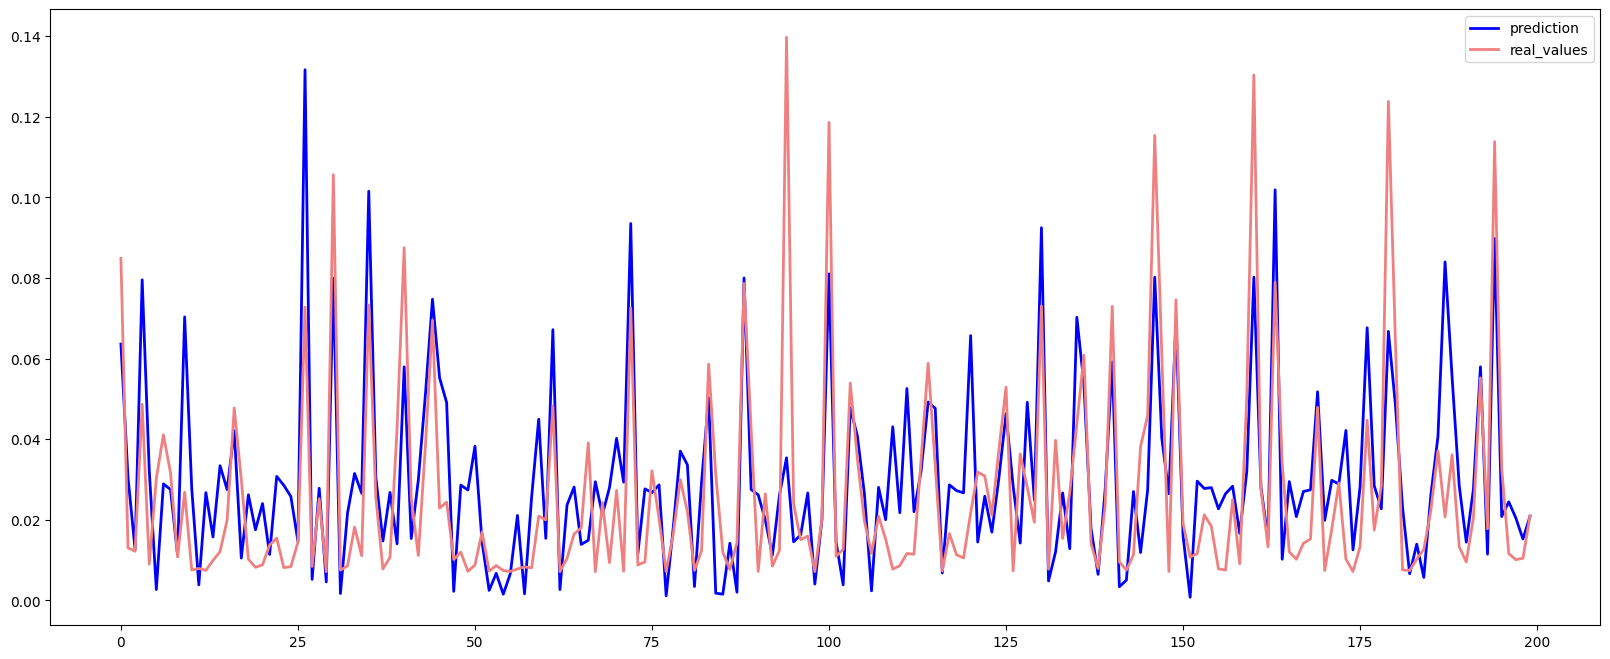

In [292]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_val[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_val[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/lr_real_pred.png')
plt.show()

**Random Forest Regressor Model**

In [293]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [294]:
rf_acc = rf.score(X_val,y_val)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  86.25017678524267


In [295]:
y_pred = rf.predict(X_val)

**Evaluating built model**

In [296]:
print("MAE" , metrics.mean_absolute_error(y_val, y_pred))
print("MSE" , metrics.mean_squared_error(y_val, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print("R2" , metrics.explained_variance_score(y_val, y_pred))

MAE 0.007746866927768106
MSE 0.00014582475196059106
RMSE 0.012075791980677337
R2 0.8625083354667775


**Storing Predicted value under results folder**

In [297]:
rf_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
rf_df.to_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/rf_real_pred.csv')
rf_df

,Actual,Predicted
105344,0.084861,0.064195
123218,0.013044,0.024349
339421,0.012214,0.017901
207114,0.048672,0.055180
88467,0.008990,0.028112
...,...,...
207791,0.007503,0.020833
195777,0.085671,0.026634
187541,0.019868,0.028500
222952,0.027614,0.025305


**Plot and Store Prediction Vs Actuals sales number**

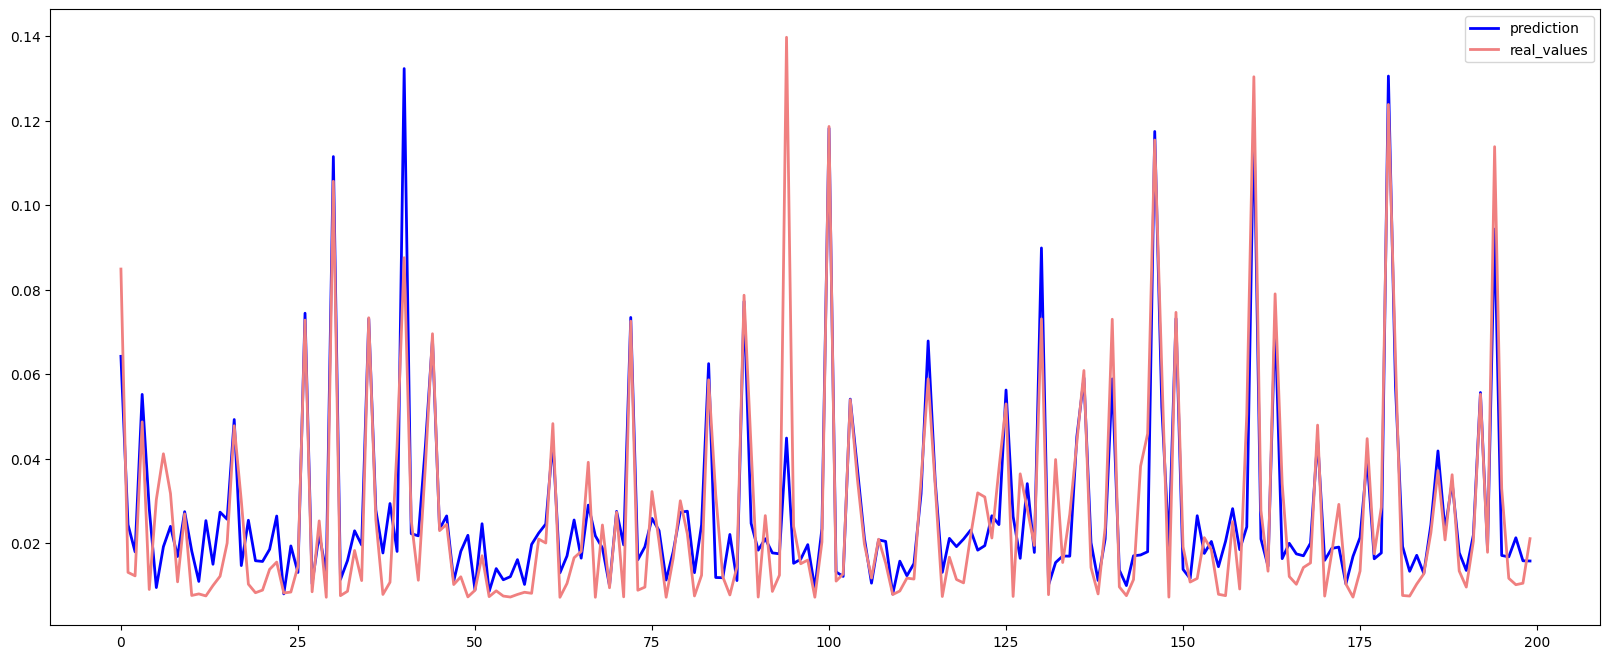

In [298]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_val[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_val[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/rf_real_pred.png')
plt.show()

**Tunning the model**

In [299]:
def test_params(**params):
    model = RandomForestRegressor(random_state=0, n_jobs=-1, n_estimators=16, **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_val), y_val, squared=False)
    return train_rmse, val_rmse

In [300]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [301]:
test_params()

(0.010781785596571326, 0.012121268192571049)

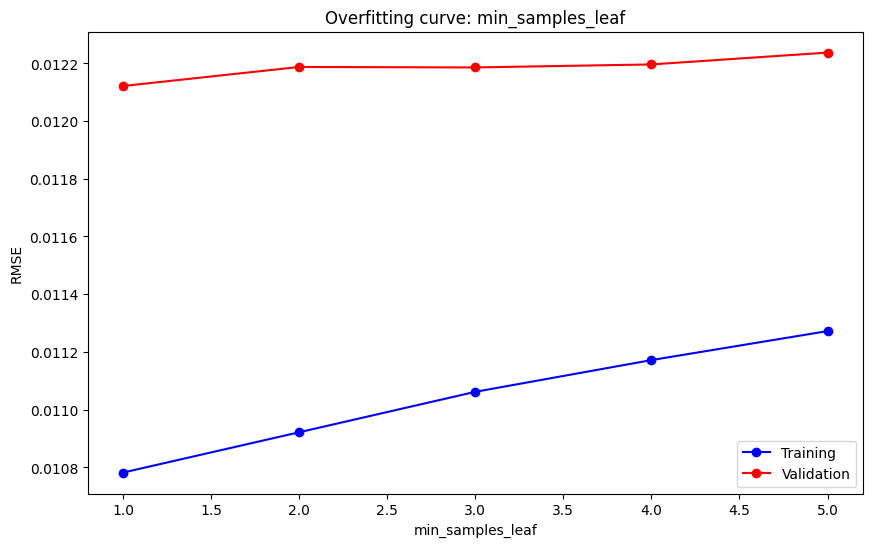

In [302]:
test_param_and_plot('min_samples_leaf', [1, 2, 3, 4, 5])

In [303]:
test_params(min_samples_leaf = 5)

(0.011272058408721067, 0.01223701032471959)

**Checking Overfitting**

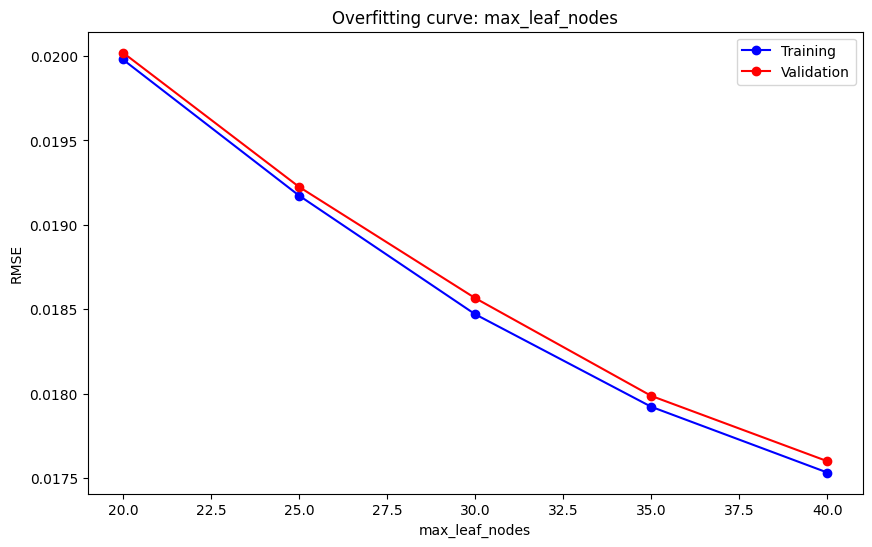

In [304]:
test_param_and_plot('max_leaf_nodes', [20, 25, 30, 35, 40])

In [305]:
test_params(max_leaf_nodes = 20)

(0.01997835888220733, 0.02001931382157343)

In [306]:
test_params(max_depth = 10)

(0.017769296086519754, 0.017919607761944498)

**Training model with the best parameters**

In [307]:
rf2 = RandomForestRegressor(n_estimators=16, random_state = 0, min_samples_leaf = 1)

In [308]:
rf2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=16, random_state=0)

In [310]:
rf2_train_preds = rf2.predict(X_train)

**Tuned Model Forecast Accuracy**

In [311]:
rf2_acc = rf2.score(X_val,y_val)*100
print("Random Forrest Accuracy - ",rf2_acc)

Random Forrest Accuracy -  86.14642089672682


In [312]:
rf2_train_rmse = mean_squared_error(y_train, rf2_train_preds, squared=False)

In [313]:
rf2_val_preds = rf2.predict(X_val)

**Evaluating built model**

In [314]:
rf2_val_rmse = mean_squared_error(y_val, rf2_val_preds, squared=False)

In [315]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 0.010781785596571326, Validation RMSE: 0.012121268192571047


In [316]:
print("R2" , metrics.explained_variance_score(y_val, rf2_val_preds))

R2 0.8614704785355473


In [317]:
rf2_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

**Showing the feature coefficient**

In [318]:
rf2_importance_df

,feature,importance
0,Size,0.255486
1,Dept_92,0.118348
2,Dept_95,0.100444
3,Dept_38,0.073481
4,Week,0.048031
6,Dept_72,0.043183
5,Dept_90,0.037768
7,Dept_40,0.035936
8,Dept_2,0.034420
9,Dept_91,0.027033


<Axes: xlabel='importance', ylabel='feature'>

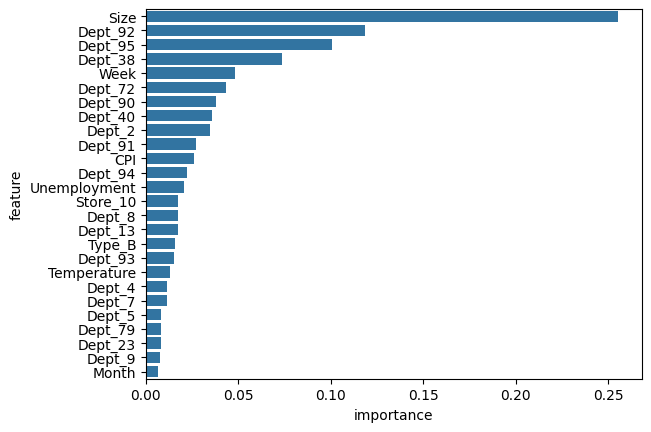

In [319]:
sns.barplot(data=rf2_importance_df, x='importance', y='feature')

# **Decision Tree Model**

In [320]:
from sklearn.tree import DecisionTreeRegressor

In [321]:
tree = DecisionTreeRegressor(random_state=0)

In [322]:
%%time
tree.fit(X_train, y_train)

CPU times: user 3.97 s, sys: 31.8 ms, total: 4 s
Wall time: 4.1 s


DecisionTreeRegressor(random_state=0)

In [323]:
from sklearn.metrics import mean_squared_error

In [324]:
tree_train_preds = tree.predict(X_train)

In [325]:
tree_acc = tree.score(X_val,y_val)*100
print("Decision Tree Accuracy - ",tree_acc)

Decision Tree Accuracy -  84.69779262111429


In [326]:
tree_train_rmse = mean_squared_error(y_train, tree_train_preds, squared=False)

In [327]:
tree_val_preds = tree.predict(X_val)

**Evaluating built model**

In [328]:
tree_val_rmse = mean_squared_error(y_val, tree_val_preds, squared=False)

In [329]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.010597200403654625, Validation RMSE: 0.012739257251699311


In [330]:
tree_importances = tree.feature_importances_

In [331]:
tree_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

**Showing Important Feature**

In [332]:
tree_importance_df

,feature,importance
0,Size,0.262822
1,Dept_92,0.118647
2,Dept_95,0.101138
3,Dept_38,0.073579
4,Week,0.053541
6,Dept_72,0.043224
7,Dept_40,0.035779
5,Dept_90,0.035206
8,Dept_2,0.034065
9,Dept_91,0.026931


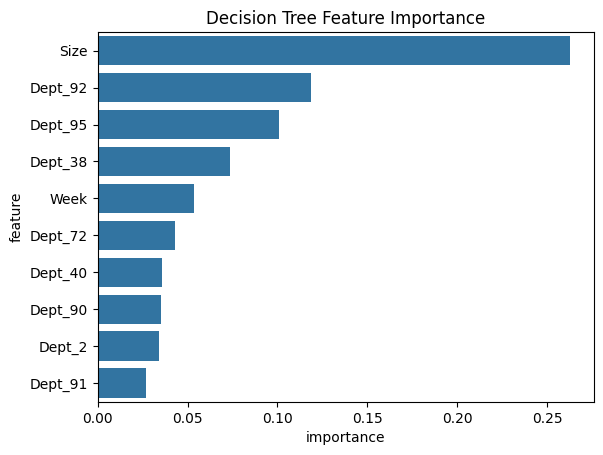

In [333]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

In [335]:
print("R2" , metrics.explained_variance_score(y_val, tree_val_preds))

R2 0.8469862048336699


**XGBoost Model**

In [336]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [337]:
xgb_acc = xgbr.score(X_val,y_val)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  86.53626878721565


In [338]:
y_pred = xgbr.predict(X_val)

**Evaluating built model**

In [339]:
print("MAE" , metrics.mean_absolute_error(y_val, y_pred))
print("MSE" , metrics.mean_squared_error(y_val, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
print("R2" , metrics.explained_variance_score(y_val, y_pred))

MAE 0.007976926206961523
MSE 0.00014279058238808018
RMSE 0.011949501344745737
R2 0.86536983275248


**Storing Predicted value under results folder**

In [340]:
xgb_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})
xgb_df.to_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
105344,0.084861,0.065941
123218,0.013044,0.025297
339421,0.012214,0.017943
207114,0.048672,0.057243
88467,0.008990,0.028664
...,...,...
207791,0.007503,0.020485
195777,0.085671,0.028680
187541,0.019868,0.029582
222952,0.027614,0.025663


**Plot and Store Prediction Vs Actuals sales number**

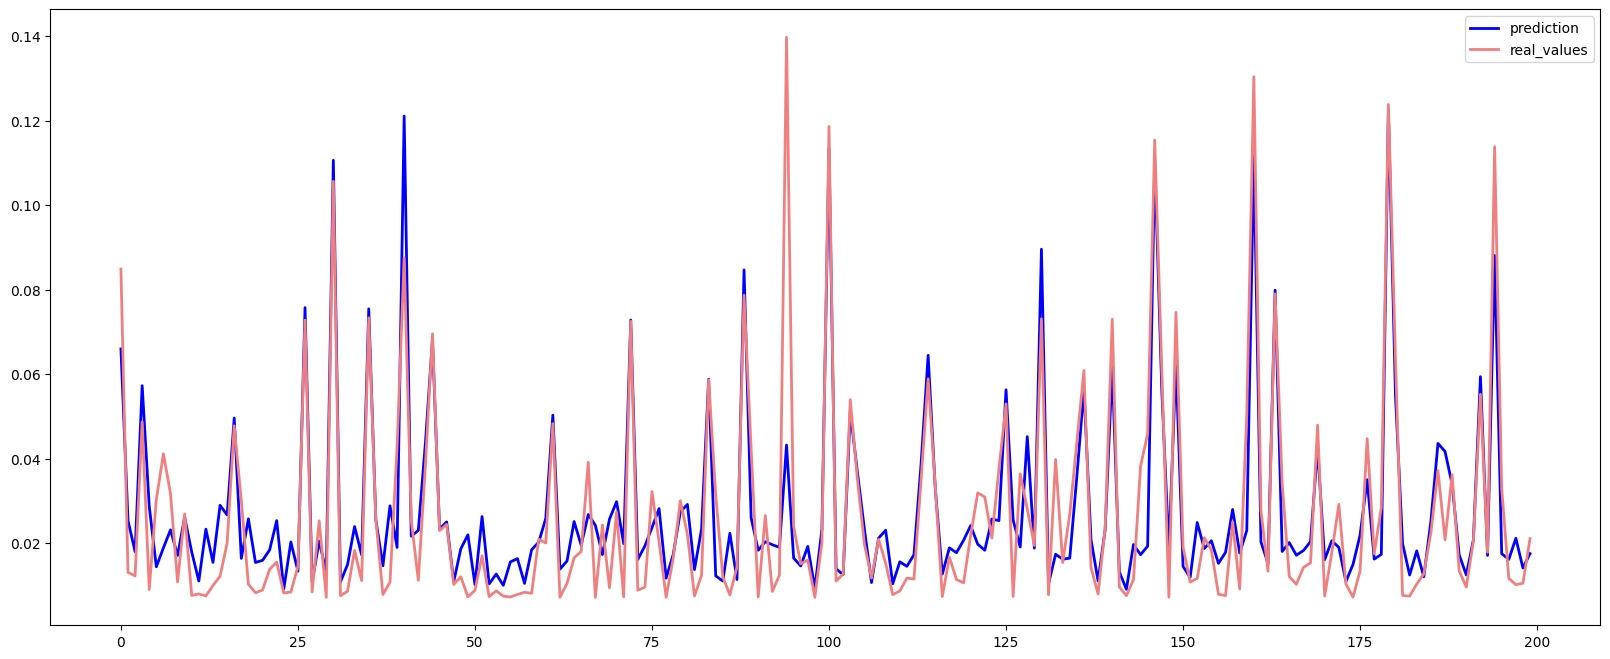

In [341]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_val[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_val[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.savefig('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/xgb_real_pred.png')
plt.show()

**Comparing Models**

In [356]:
acc = {'models':['lr_acc','rf2_acc','dt_acc','xgb_acc'],'accuracy':[lr_acc,rf2_acc,tree_acc,xgb_acc]}

**Visualizing the model results for best model selection**

In [357]:
acc_df = pd.DataFrame(acc)
acc_df

,models,accuracy
0,lr_acc,57.713369
1,rf2_acc,86.146421
2,dt_acc,84.697793
3,xgb_acc,86.536269


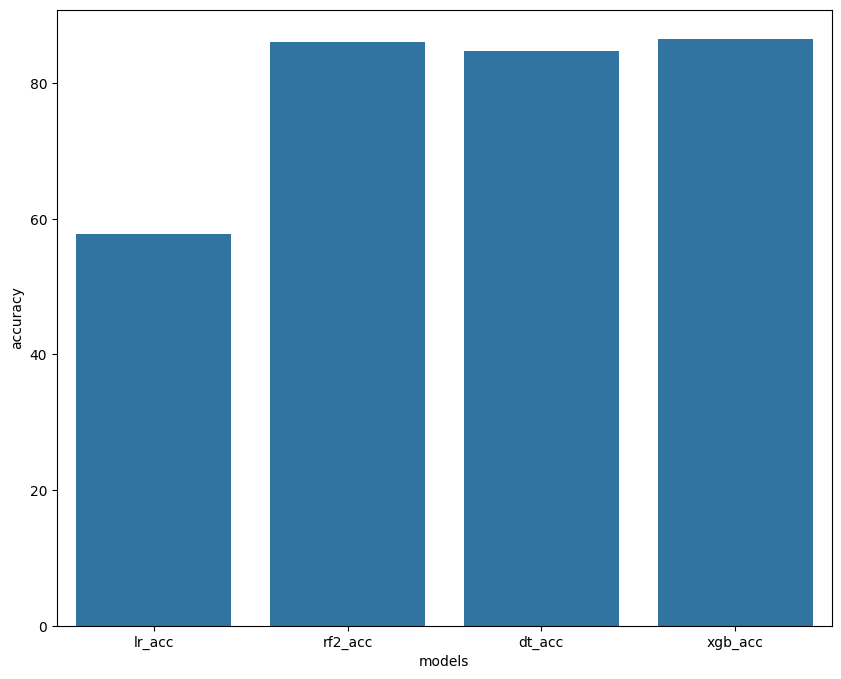

In [358]:
plt.figure(figsize=(10,8))
sns.barplot(x='models',y='accuracy',data=acc_df)
plt.savefig('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/compared_models.png')
plt.show()

# **Making Predictions on the Test Set**

**Applying preprocessing steps**

In [364]:
final_test_df = pd.merge(test_df, df_1, on = ['Store','Date','IsHoliday'])

In [365]:
final_test_df['Date'] = pd.to_datetime(final_test_df['Date'])
final_test_df['Year'] = final_test_df['Date'].dt.year
final_test_df['Month'] = final_test_df['Date'].dt.month
final_test_df['Week'] = final_test_df['Date'].dt.week

final_test_df['Total_MarkDown'] = final_test_df['MarkDown1']+final_test_df['MarkDown2']+final_test_df['MarkDown3']+final_test_df['MarkDown4']+final_test_df['MarkDown5']

final_test_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

num_col = ['Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']

# Create a MinMaxScaler object
#scaler = MinMaxScaler()

# Scale the data
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the data
final_test_df[num_col] = scaler.fit_transform(final_test_df[num_col])


cat_col = ['Store','Dept','Type']
data_cat = final_test_df[cat_col].copy()
data_cat = pd.get_dummies(data_cat,columns=cat_col, drop_first= True)

final_df = pd.concat([final_test_df, data_cat],axis=1)

final_df.drop(columns=cat_col,inplace=True)

final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)

final_df.drop(columns=['Date'],inplace=True)

**Finalising the test dataframe with the best selcted features**






In [369]:
final_df= final_df[x]

**Make predictions using best selected model**

In [370]:
test_preds = rf2.predict(final_df)

In [371]:
test_df['Weekly_Sales'] = test_preds

**Storing test prediction under results folder**

In [373]:
test_df.to_csv('/content/drive/MyDrive/UpGrad/Walmart Sales Forecast/results/test_result.csv', index=False)